
<h1 style="font-size: 50px; color: #3399ff ;text-align: center;
"> Profit in Startup of a Company </h1>



  
#### What's inside is more than just rows and columns. R&D means research and development, administrative and management spends along with location of the company to determine the expected profit on startup of a company.


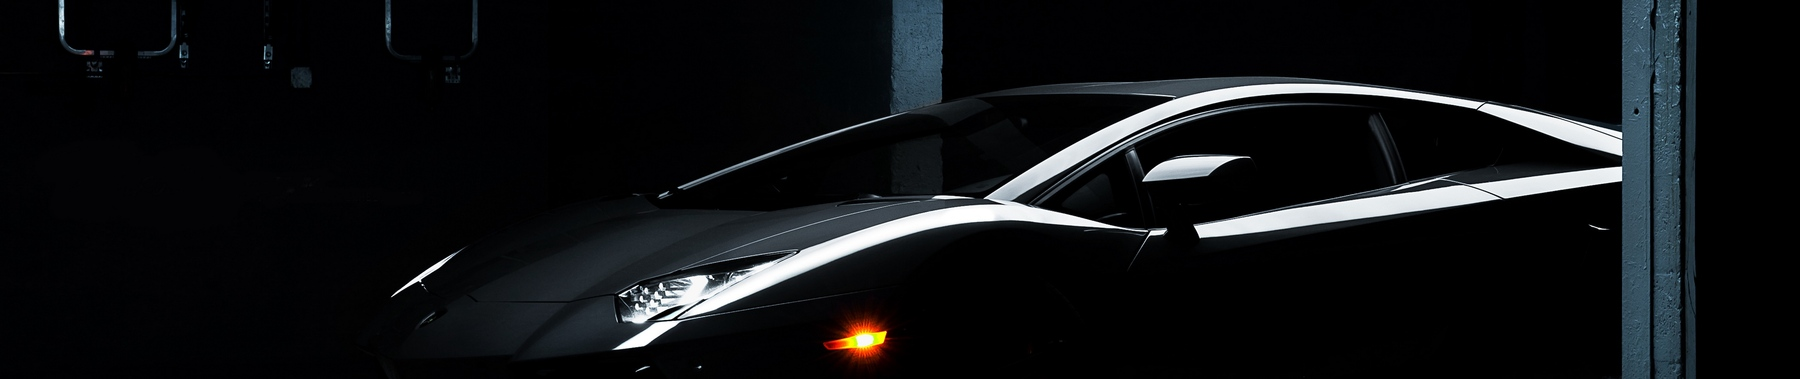

##  Import libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

## Reading Dataset

In [2]:
data=pd.read_csv('./50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Let’s have a look at the insights of the columns to understand the data type of all the columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Then find out How many Raws and columns that the dataset contains

In [4]:
data.shape

(50, 5)

### Finding the statistical measures

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


### Let’s have a look at whether this dataset contains any null values or not

In [6]:
data.isnull().mean()*100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

<h1 style="font-size: 30px; color: #3333cc ;text-align: center;
"> Exploratory Data Analysis </h1>

## Univariate analysis


### Analyze the data by Plotiing the Histplot

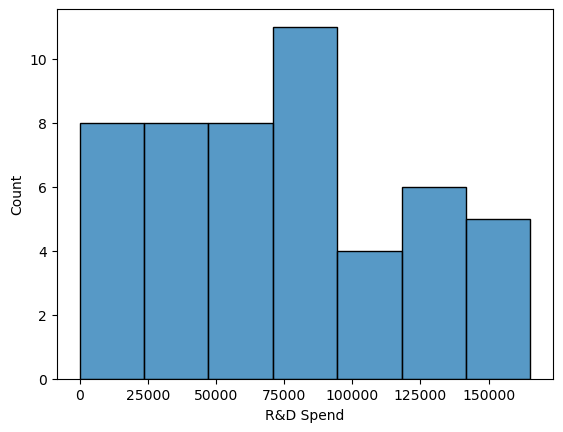

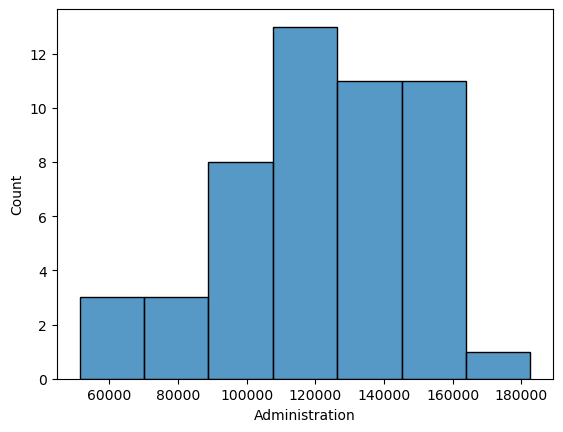

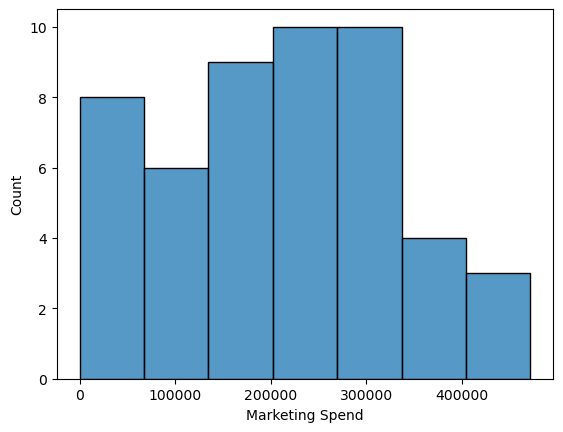

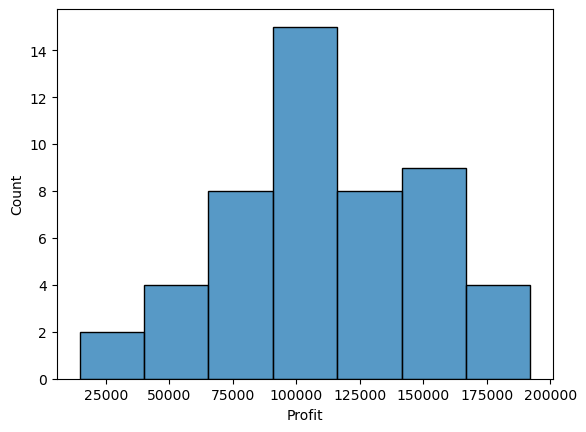

In [7]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.histplot( x =data[i])
        plt.show()

### Analyze the data by plottinig kde plot

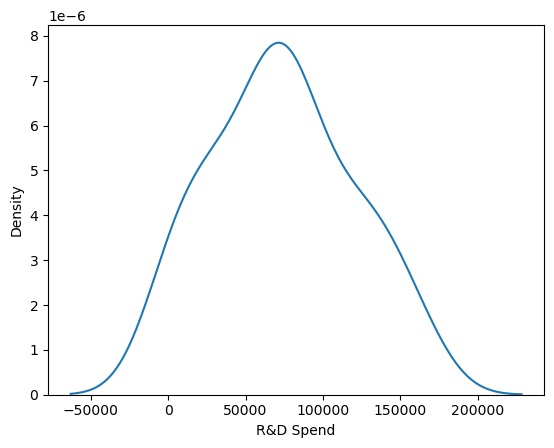

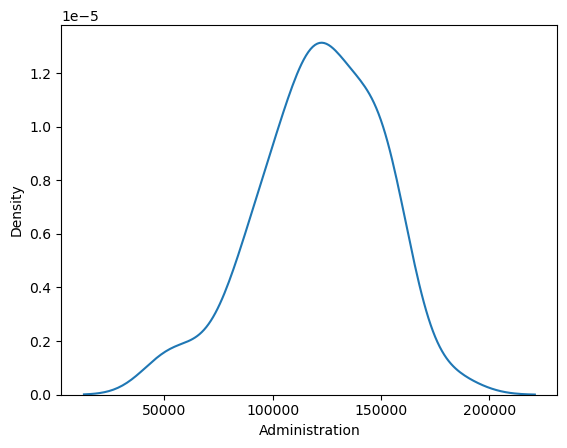

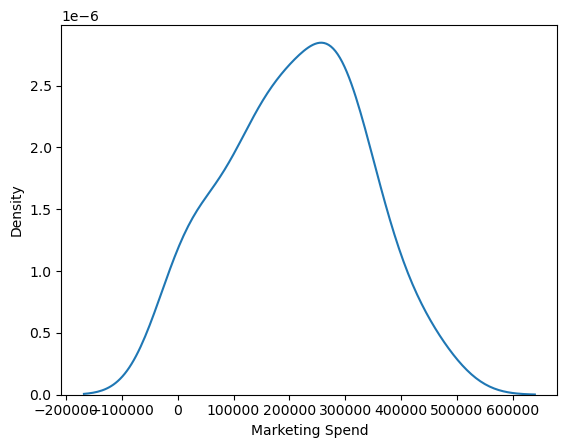

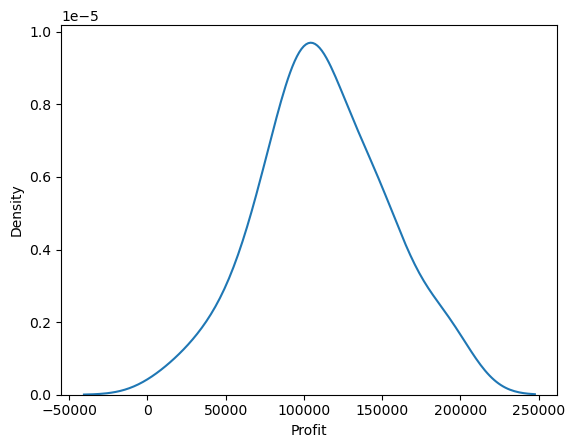

In [8]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.kdeplot( x =data[i])
        plt.show()

## Multi variate analysis

## Bar plot

In [9]:
data.sort_values(by='Profit', inplace=True)

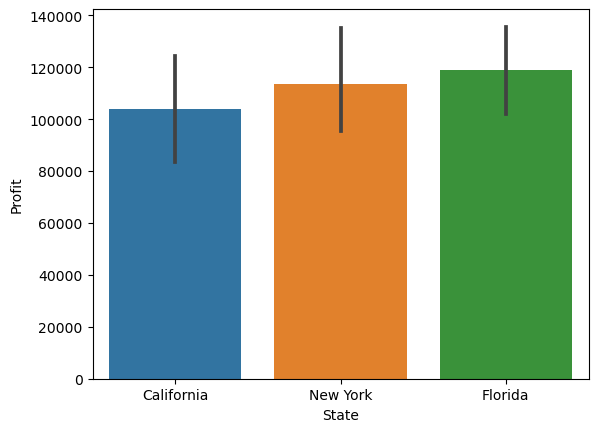

In [10]:
sns.barplot(x='State', y='Profit', data=data);

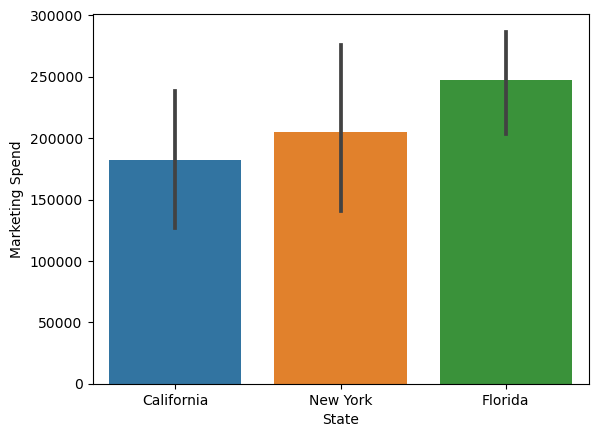

In [11]:
sns.barplot(x='State', y='Marketing Spend', data=data);

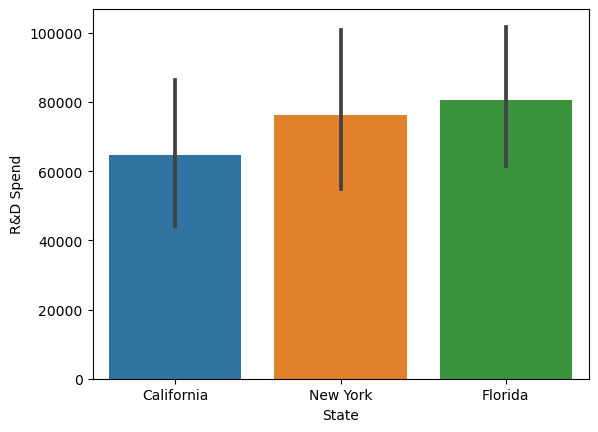

In [12]:
sns.barplot(x='State', y='R&D Spend', data=data);

### Pie plot

### Then plot pie chart and plot bar to check which state have the largest profit

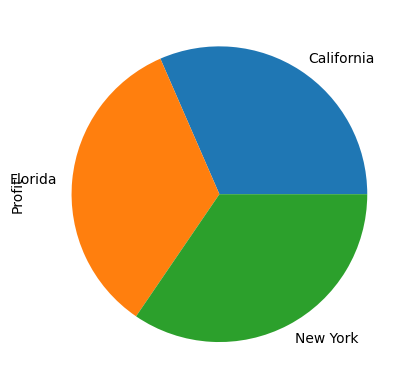

In [13]:
state_profit =data.groupby(['State'])['Profit'].sum()
state_profit.plot.pie();

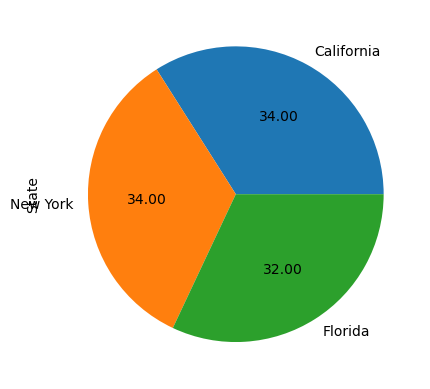

In [14]:
data.State.value_counts().plot.pie(autopct='%.2f');

### Scatter plot

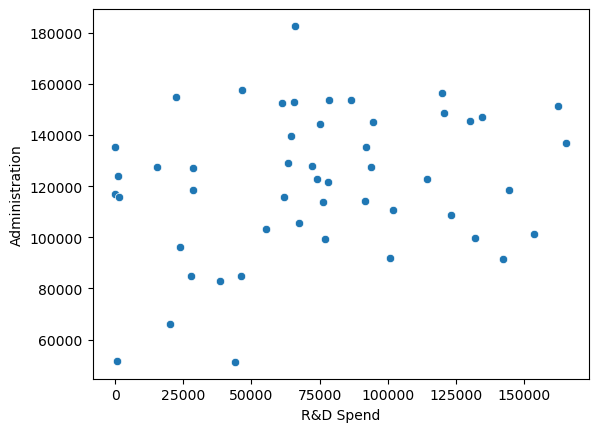

In [15]:
sns.scatterplot(x='R&D Spend', y='Administration', data=data);

### Line plot

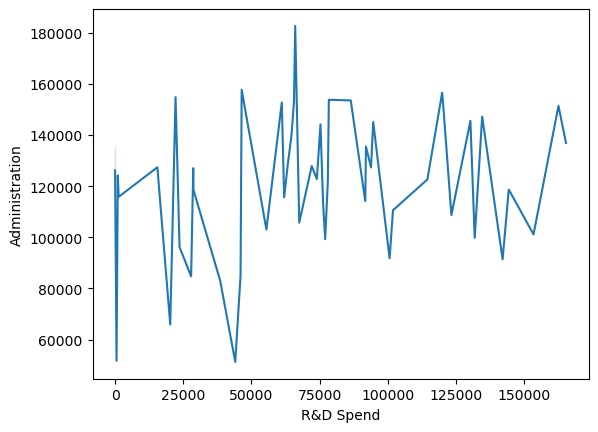

In [16]:
sns.lineplot(x='R&D Spend', y='Administration', data=data);

### Find out the outliers present in the data set using Boxplot

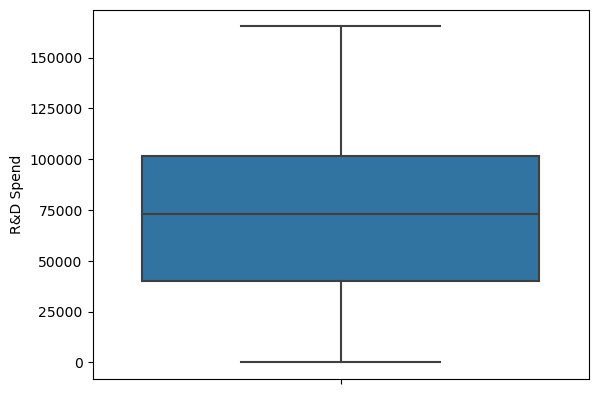

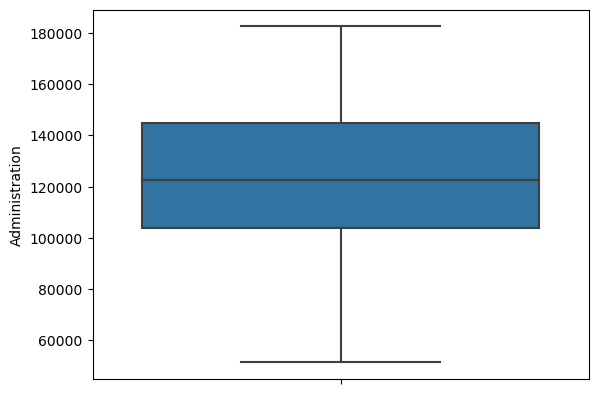

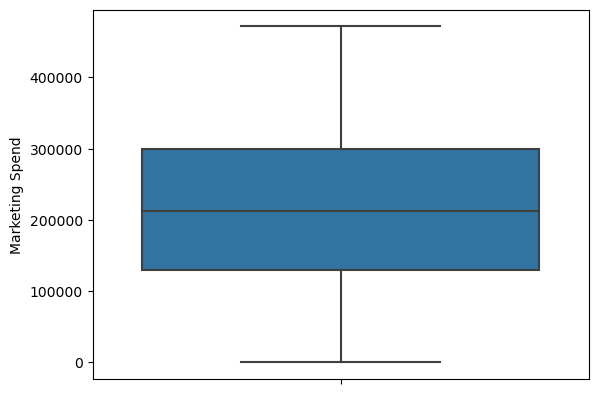

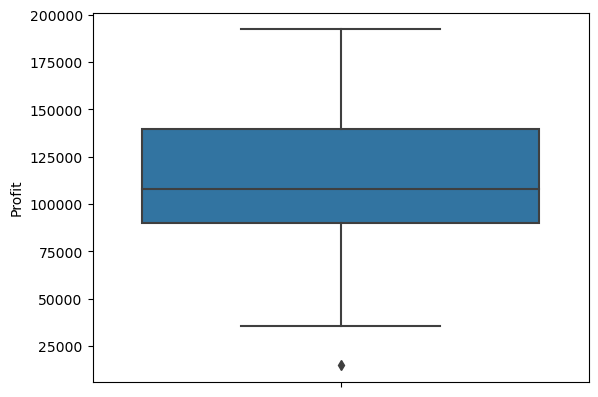

In [17]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot( y =data[i])
        plt.show()

## Setting the outlier limits

In [18]:
def outlier_limit(col):
    Q3, Q1 =np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [19]:
for column in data.columns:
    if data[column].dtype !="object":
        UL,LL= outlier_limit(data[column])
        data[column] = np.where((data[column]>UL)|(data[column]<LL), np.nan, data[column])
 

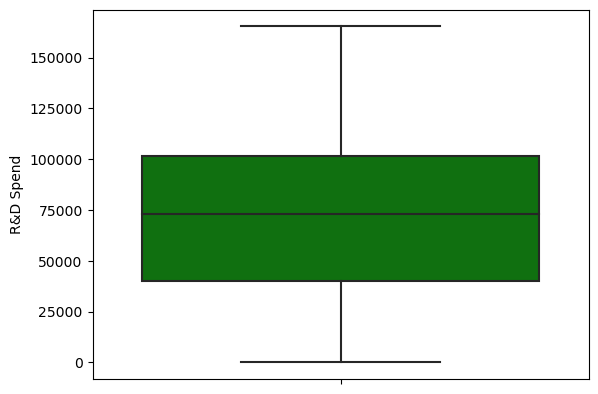

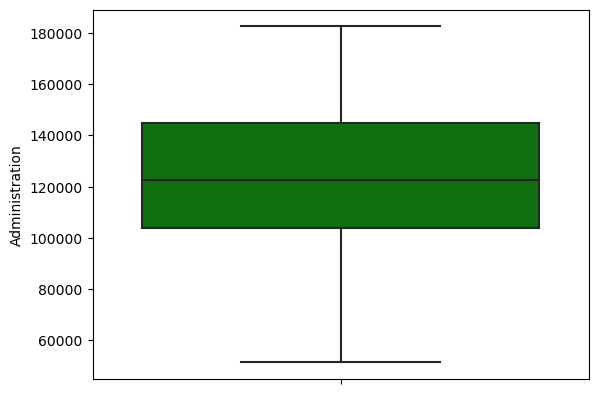

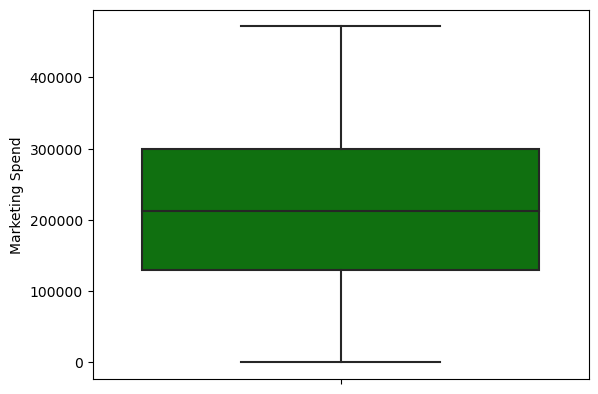

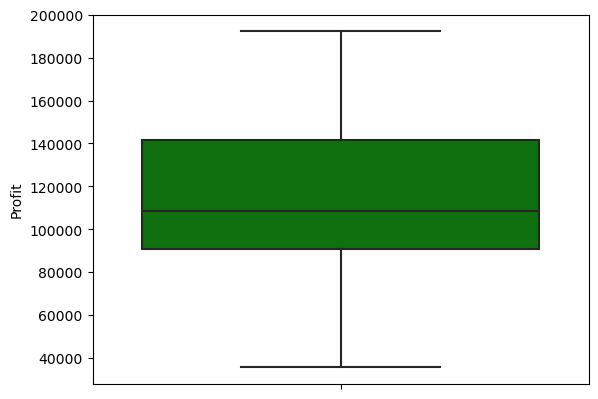

In [20]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.boxplot(y=data[i], color="green")
    plt.show();

### No outliers present.

### Checking the correlation with the target 'Profit' correlation Using Heatmap¶

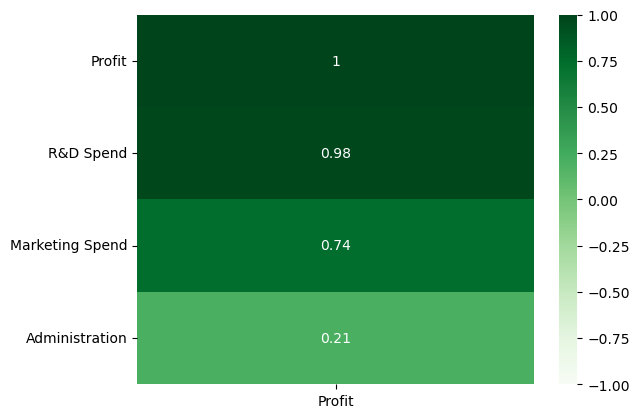

In [21]:
sns.heatmap(data.corr()[["Profit"]].sort_values(by="Profit", ascending=False), vmin=-1, vmax=1, annot=True,cmap="Greens");

In [22]:
data.dropna(inplace=True)

## Label Encoding

In [23]:
le = LabelEncoder()
data["State"]=le.fit_transform(data["State"])

## Lets take only the columns with good correlation with the target

### Then i take Engine and date values in x and profit values in y for prediction purpose

In [24]:
x= data[['R&D Spend','Marketing Spend']].values
y = data[['Profit']].values

## Feature Scaling
### Then i take MinMaxScaler for scalling and then i done cross validation to find out the best model

In [25]:
rs =StandardScaler()

In [26]:
x = rs.fit_transform(x)

## splitting the data into training and testing set

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [28]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [29]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  7952.746938816778
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  7985.779347143839
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  115676.32146344997
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  14811.734582112927
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  14082.16635612233
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  15335.101225263348
*********************************************

#### We may proceed with LinearRegression since it is having the lowest RMSE

## Model Building

In [30]:
model=LinearRegression()

## Model Fiiting

In [31]:
model.fit(x_train, y_train)

LinearRegression()

In [32]:
training_score=model.score(x_train, y_train)*100
testing_score=model.score(x_test, y_test)*100
score= r2_score(y_test, model.predict(x_test))*100
mae=mean_absolute_error(y_test, model.predict(x_test))
mse=mean_squared_error(y_test, model.predict(x_test))
rmse=np.sqrt(mse)

In [33]:
training_score

96.74520907416823

In [34]:
testing_score

90.85943517165207

In [35]:
score

90.85943517165207

In [36]:
mae

6832.796396394233

In [37]:
mse

71769227.99105665

In [38]:
rmse

8471.672089443538

In [39]:
y_pred= model.predict(x)

### After predicting the y value i decided to compare it with actual value

In [40]:
OUTPUT=pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,35673.41,49102.763193
1,42559.73,48675.506614
2,49490.75,57767.847823
3,64926.08,49515.531438
4,65200.33,66924.743968
5,69758.98,61860.902354
6,71498.49,71322.499194
7,77798.83,75120.547076
8,78239.91,76025.239776
9,81005.76,83812.870960


### Then I plott the Actual value vs predicted value with the help of sctterplot
### VISUALISING THE OUTPUT

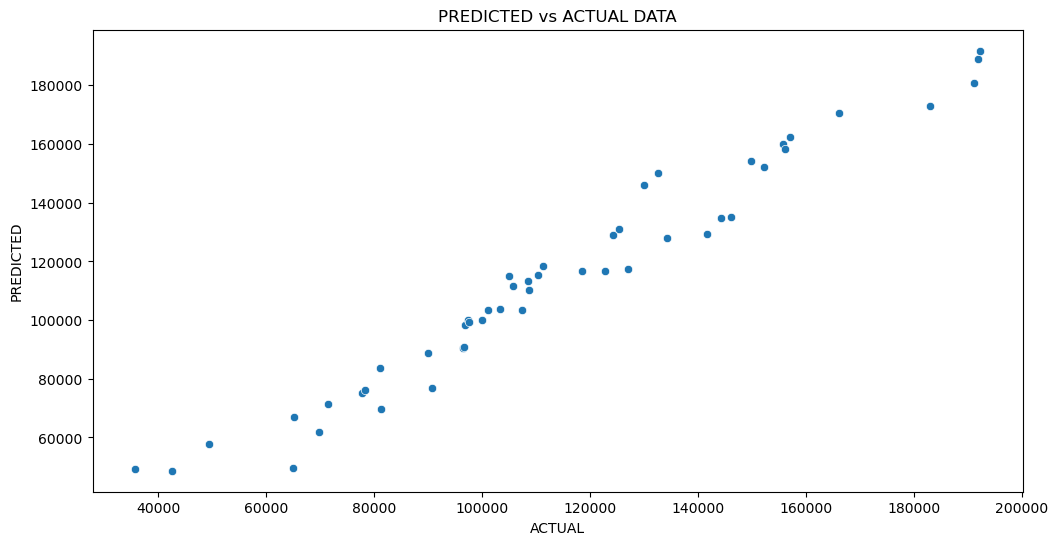

In [41]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED vs ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");

## CONCLUSION

### There is a high correlation, exists in the dataset, the profit is correlated with other factores in the dataset.